In [1]:
import pandas as pd
import numpy as np
import datetime

import seaborn as sns
import matplotlib as plt

In [2]:
df = pd.read_csv('../data/consumption_2024.csv', sep=";", date_format='timestamp')
df.head()

,Datum von,Datum bis,Gesamt (Netzlast) [MWh] Berechnete Auflösungen,Residuallast [MWh] Berechnete Auflösungen,Pumpspeicher [MWh] Berechnete Auflösungen
0,01.07.2023 00:00,01.07.2023 01:00,"41.293,00","32.400,00","417,50"
1,01.07.2023 01:00,01.07.2023 02:00,"39.248,25","28.314,75","369,50"
2,01.07.2023 02:00,01.07.2023 03:00,"38.006,50","24.653,25","572,75"
3,01.07.2023 03:00,01.07.2023 04:00,"37.418,00","22.519,00","662,00"
4,01.07.2023 04:00,01.07.2023 05:00,"37.485,00","20.675,25","1.030,75"


In [3]:
# Convert 'Datum von' column to datetime with specified format
df['Datum von'] = pd.to_datetime(df['Datum von'], format='%d.%m.%Y %H:%M')

# Convert 'Gesamt (Netzlast) [MWh] Berechnete Auflösungen' to numeric
df['Gesamt (Netzlast) [MWh] Berechnete Auflösungen'] = df['Gesamt (Netzlast) [MWh] Berechnete Auflösungen'] \
    .str.replace('.', '', regex=False) \
    .str.replace(',', '.', regex=False) \
    .astype(float)

# Extract hour from 'Datum von' and create a new column 'hour'
df['hour'] = df['Datum von'].dt.hour
df['day_of_year'] = df['Datum von'].dt.day_of_year

# Aggregate 'Gesamt (Netzlast) [MWh] Berechnete Auflösungen' by 'hour'
aggregated_df = df.groupby(['day_of_year', 'hour'])['Gesamt (Netzlast) [MWh] Berechnete Auflösungen'].mean().reset_index()

# Rename the aggregated column to 'total'
aggregated_df.rename(columns={'Gesamt (Netzlast) [MWh] Berechnete Auflösungen': 'total'}, inplace=True)


In [4]:
aggregated_df

,day_of_year,hour,total
0,1,0,40591.25
1,1,1,39227.50
2,1,2,38244.75
3,1,3,37514.75
4,1,4,37141.00
...,...,...,...
8754,365,19,50895.25
8755,365,20,47558.50
8756,365,21,45615.00
8757,365,22,44542.00


In [5]:
aggregated_df['usage'] = aggregated_df['total'] / aggregated_df['total'].sum()
aggregated_df

,day_of_year,hour,total,usage
0,1,0,40591.25,0.000087
1,1,1,39227.50,0.000084
2,1,2,38244.75,0.000082
3,1,3,37514.75,0.000081
4,1,4,37141.00,0.000080
...,...,...,...,...
8754,365,19,50895.25,0.000109
8755,365,20,47558.50,0.000102
8756,365,21,45615.00,0.000098
8757,365,22,44542.00,0.000096


<Axes: xlabel='hour', ylabel='total'>

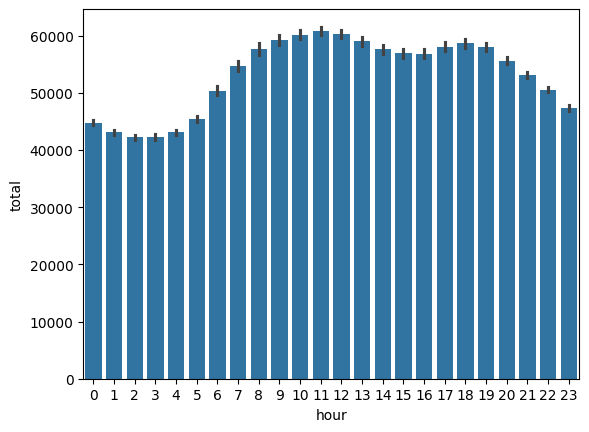

In [6]:
sns.barplot(aggregated_df, x = 'hour', y = 'total')

In [8]:
aggregated_df.to_csv('../data/prepared_consumption2024.csv', index=False)